Which fuel type would you like to use?
   1. Methane
   2. Jet Fuel (kerosene)
   3. Hydrolox
   4. Ammonium nitrate composite
Main Engine Cut Off

Stage Seperation
second stage burn
Second Stage Cut Off

Apogee reached
Drogue chute is open
Parachute deployed


<Figure size 640x480 with 0 Axes>

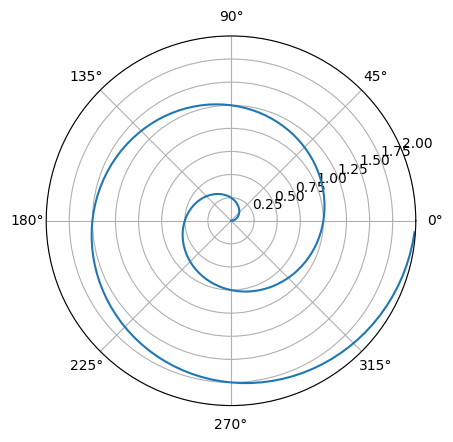

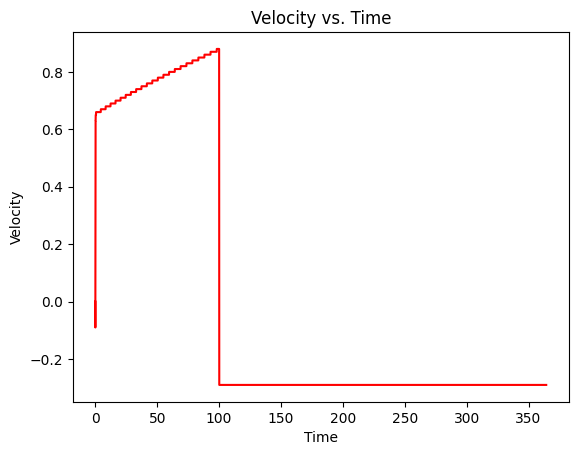

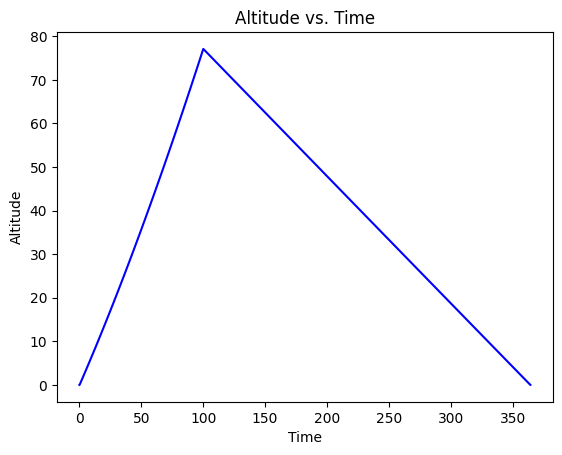

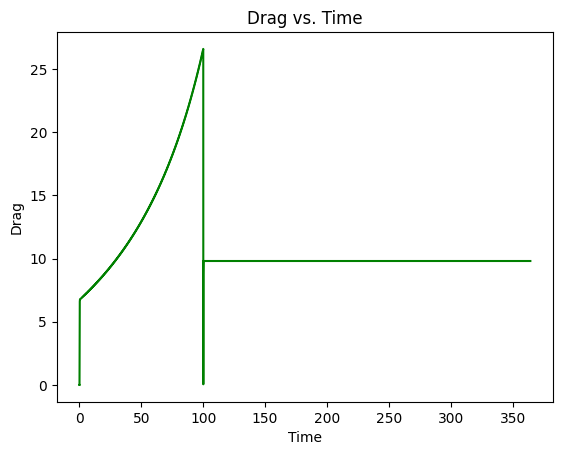

In [4]:
# Purpose: Create a Rocket Trajectory Simulation
# Author: Sami G and Denali T
# Date: 2024/04/29
import math
import matplotlib.pyplot as plt
import numpy as np

# Setting variables and constants

# Constants
PI = math.pi
G = 6.67*math.pow(10, -11)
MEarth = 5.97*math.pow(10, 24)
radius = 6.371*math.pow(10, 6)

def print_data(t, h, v, a, d):
    if h >= 0:
        print("Time: " + str(round(t, 2)) + "s")
        print("Altitude: " + str(round(h, 2)) + "m")
        print("Velocity: " + str(round(v, 2)) + "m/s")
        print("Acceleration: " + str(round(a, 2)) + "m/s^2")
        print("Drag: " + str(round(d, 2)))
        print("")


# Calculates temperature (h is altitude):
def temperature(h):
    if h < 11000:
        return 15.04 - 0.00649 * h
    elif 11000 < h < 25000:
        return -56.46
    elif h > 25000:
        return -131.21 + 0.00299 * h


# Calculates air pressure (h is altitude):
def air_pressure(h):
    if h < 11000:
        return 101.29 * math.pow((temperature(h) + 273.1) / 288.08, 5.256)
    elif 11000 < h < 25000:
        return 22.65 * math.exp(1.73 - 0.000157 * h)
    elif h > 25000:
        return 2.488 * math.pow((temperature(h) + 273.1) / 216.6, -11.388)


# Calculates the air density (h is altitude):
def air_density(h):
    return air_pressure(h) / (0.2869 * (temperature(h) + 273.1))

# Calculates gravity at an altitude
def gravity(h):
    g = G*MEarth / math.pow(radius+h,2)
    return g

# Initial conditions
orbit = False
time = 0
t_max = 500 # Maximum time the simulator runs
timeIncrement = 0.01
drag = 0 # drag
altitude = 0 # vertical height
v = 0 # velocity
a = 0 # acceleration
x = [] # Array for time axis
y = [] # Array for altitude axis
d = [] # Array for drag axis
v_y = [] # Array for vertical velocity axis
pol_r = [] # Array for radius for polar coordinate graph
pol_angle = [] # Array for angle for polar coordinate graph

# Getting user input on the mass and volumes of the rocket
mBody = float(input("How heavy is the rocket without propellants? (kg) "))  # Kg
while (mBody<=0):
    mBody = float(input("How heavy is the rocket without propellants? (kg) "))

# Fuel for First Stage
mFuel1 = float(input("What is the mass of the fuel for the first stage? (kg) "))  # Kg
while (mFuel1<=0):
    mFuel1 = float(input("How heavy is the fuel? (kg) "))
tFlow = float(input("How long will the first stage fire? (s) "))  # Kg/s
while (tFlow<=0):
    tFlow = float(input("How long will the first stage fire? (s) "))
vFlow = mFuel1 / tFlow

# Fuel for Second stage
mFuel2 = float(input("What is the mass of the fuel for the second stage? (kg) "))  # Kg
while (mFuel2<=0):
    mFuel2 = float(input("How heavy is the fuel? (kg) "))
tFlow2 = float(input("How long will the second stage fire? (s) "))  # Kg/s
while (tFlow2<=0):
    tFlow2 = float(input("How long will the second stage fire? (s) "))
vFlow2 = mFuel2 / tFlow2

# Stage seperation
sSeperation = float(input("How far apart are the stages? (s) "))

#Getting turning angle if orbit
turn = False
turnAlt = 0
turnAngleLaunch = 0
turnAngleEarth = 0
temporary = input(str("Will the rocket have a gravity turn (if trying to get into orbit)? (y/n): "))
if temporary == "y" or temporary=="Y":
  turn = True
  turnAlt = float(input("At what altitude will the rocket start to turn? (m) "))
  turnAngle = float(input("At what angle will the rocket pitch over? (degrees) "))

# Choosing the type of fuel
fuelVelocity = 0
print("Which fuel type would you like to use?")
print("   1. Methane")
print("   2. Jet Fuel (kerosene)")
print("   3. Hydrolox")
print("   4. Ammonium nitrate composite")
choice = 0
while (choice < 1 or choice > 4):
    choice = int(input("Enter 1, 2, 3, or 4 -> "))
if (choice == 1):
    fuelVelocity = 3034  # m/s
if (choice == 2):
    fuelVelocity = 2941  # m/s
if (choice == 3):
    fuelVelocity = 3816  # m/s
if (choice == 4):
    fuelVelocity = 2100  # m/s

mCurrent = mBody + mFuel1 + mFuel2

# Radius of rocket
rRocket = float(input("Enter the radius of the rocket in m: "))
areaRocket = PI * rRocket ** 2
# Calculating DragCoefficient which is 1/2*A*C
dragCoefficient = 0.5 * areaRocket * 0.75

# Drogue chute
drogue = False
drogueArea = 0
temporary = input(str("Is there a drogue chute? (y/n): "))
if temporary == "y" or temporary == "Y":
    drogue = True
    drogueArea = PI * math.pow(float(input("Enter the radius of the drogue chute (m): ")), 2)

# Height of parachute deployment on the way down
paraH = float(input("Enter the height at which the parachute deploys (m): "))
apogee = 0
paraR = float(input("Enter the radius of the parachute (m): "))
while (paraR > 35 or paraR <= 0):
    paraR = float(input("Parachute radius must be less than 35m and positive (m): "))
paraArea = PI * math.pow(paraR, 2)

# Rocket Simulation
# While first stage fuel is flowing
while (mFuel1 > 0 and v >= 0):
    v += a * timeIncrement - drag * timeIncrement
    drag = (v * v * dragCoefficient * air_density(altitude)) / mCurrent
    a = fuelVelocity * vFlow / mCurrent - gravity(altitude)
    altitude += v * timeIncrement
    time += timeIncrement

    """
    if (turn == True and altitude > turnAlt):
        psi += timeIncrement * gravity(altitude) * math.sin(phi)
    """
    #print_data(time, altitude, v, a, drag)
    y.append(round(altitude, 2))
    x.append(round(time, 2))
    d.append(round(drag, 2))
    v_y.append(round(v, 2))

    mFuel1 -= vFlow * timeIncrement
    mCurrent = mBody + mFuel1 + mFuel2

print("Main Engine Cut Off" + "\n")
print("Stage Seperation")
mBody/=3
seperationTime = time

# Coasting till 2nd stage burn
while (time < (seperationTime + sSeperation) and v>=0):
    a = -1 * gravity(altitude)
    drag = (v * v * dragCoefficient * air_density(altitude)) / mCurrent
    v += timeIncrement * (a - drag)
    altitude += v * timeIncrement
    time += timeIncrement
    #print_data(time, altitude, v, a, drag)
    y.append(round(altitude, 2))
    x.append(round(time, 2))
    d.append(round(drag, 2))
    v_y.append(round(v, 2))
    

print ("second stage burn")
# Second Stage
while (mFuel2 > 0):
    v += timeIncrement * (a - drag)
    drag = (v * v * dragCoefficient * air_density(altitude)) / mCurrent
    a = fuelVelocity * vFlow2 / mCurrent - gravity(altitude)
    altitude += v * timeIncrement
    time += timeIncrement

    #print_data(time, altitude, v, a, drag)
    y.append(round(altitude, 2))
    x.append(round(time, 2))
    d.append(round(drag, 2))
    v_y.append(round(v, 2))

    mFuel2 -= vFlow2 * timeIncrement
    mCurrent = mBody + mFuel2

print("Second Stage Cut Off" + "\n")
# Checking if the rocket enters orbit around the Earth
if (v >= math.sqrt(G*MEarth/(altitude+radius)) and altitude > 100000):
    orbit = True

if (orbit == False):
    # While fuel is not flowing and rocket is in motion
    while (v >= 0):
        #functions.print_data(time, altitude, v, a, drag)
        y.append(round(altitude, 2))
        x.append(round(time, 2))
        d.append(round(drag, 2))
        v_y.append(round(v, 2))

        a = -1 * gravity(altitude)
        drag = v * v * dragCoefficient * air_density(altitude) / mCurrent
        v += a * timeIncrement - drag * timeIncrement
        altitude += v * timeIncrement
        time += timeIncrement

    print("Apogee reached")
    apogee = altitude

    # increasing drag coefficient if drogue chute
    if (drogue == True):
        print("Drogue chute is open")
        # increasing drag. Coef = 1/2*A*C
        dragCoefficient += 1 / 2 * drogueArea * 1.75

    # Drogue chute
    while (altitude > paraH):
        a = -1 * gravity(altitude)
        #print(drag)
        #print_data(time, altitude, v, a, drag)
        y.append(round(altitude, 2))
        x.append(round(time, 2))
        d.append(round(drag, 2))
        v_y.append(round(v, 2))
        drag = v * v * dragCoefficient * air_density(altitude) / mCurrent
        v += a * timeIncrement + drag * timeIncrement
        if (v > 0):
            v=0
        altitude += v * timeIncrement
        time += timeIncrement

    # Activating parachute
    paraT = time
    print("Parachute deployed")
    while (altitude > 0):
        if (time <= paraT + 4):
            dragCoefficientPara = 1 / 2 * (time-paraT) / 4 * paraArea * 1.75 + 0.5 * areaRocket * 0.75
            # Once parachute opens up that it causes more drag than the drogue
            if (dragCoefficientPara > dragCoefficient):
                dragCoefficient = dragCoefficientPara
        #print(drag)
        #functions.print_data(time, altitude, v, a, drag)
        y.append(round(altitude, 2))
        x.append(round(time, 2))
        d.append(round(drag, 2))
        v_y.append(round(v, 2))
        drag = v * v * dragCoefficient * air_density(altitude) / mCurrent
        v += a * timeIncrement + drag * timeIncrement
        if (v > 0):
            v=0
        altitude += v * timeIncrement
        time += timeIncrement

    if y[-1] < 0:
        y[-1] = 0

# If rocket enters orbit
else:
    print("The rocket has entered orbit around the Earth")
    print("The altitude of the orbit is: " + str(altitude))

# Graph the data

plt.figure()


r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
plt.show()

plt.plot(x, v_y, color = "red")  # Plot some data on the axes.
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title("Velocity vs. Time")

plt.show()

plt.plot(x, y, color = "blue")  # Plot some data on the axes.
plt.xlabel('Time')
plt.ylabel('Altitude')
plt.title("Altitude vs. Time")

plt.show() # Show the altitude vs. time graph

plt.plot(x, d, color = "green")
plt.xlabel('Time')
plt.ylabel('Drag')
plt.title("Drag vs. Time")

plt.show() # Show the drag vs. time graph